<a href="https://colab.research.google.com/github/wyjustin/500lines/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E6%AF%95%E4%B8%9A%E8%AE%BE%E8%AE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://drive.google.com/u/0/uc\?id\=14S9mYJa-HHDzP4ZC-d6OUaS8_GyWmNdl\&export\=download -O final.zip

--2021-09-05 13:03:46--  https://drive.google.com/u/0/uc?id=14S9mYJa-HHDzP4ZC-d6OUaS8_GyWmNdl&export=download
Resolving drive.google.com (drive.google.com)... 108.177.11.138, 108.177.11.100, 108.177.11.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/40rtk86ddgqdd1e3vp4pi2kk7o5nq92k/1630847025000/12749306036869213277/*/14S9mYJa-HHDzP4ZC-d6OUaS8_GyWmNdl?e=download [following]
--2021-09-05 13:03:49--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/40rtk86ddgqdd1e3vp4pi2kk7o5nq92k/1630847025000/12749306036869213277/*/14S9mYJa-HHDzP4ZC-d6OUaS8_GyWmNdl?e=download
Resolving doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-08-74-docs.googleusercontent.com (d

In [2]:
!ls

final.zip  sample_data


In [3]:
!unzip final.zip

Archive:  final.zip
   creating: final/
  inflating: final/test_final.csv    
  inflating: final/Description.xlsx  
  inflating: final/train_final.csv   


In [4]:
import pandas as pd
train = pd.read_csv("final/train_final.csv", engine='python')
test = pd.read_csv("final/test_final.csv", engine='python')

In [5]:
len(train.columns.to_list())

146

In [6]:
train.columns.to_list()

['continuous_annual_inc',
 'continuous_annual_inc_joint',
 'continuous_delinq_2yrs',
 'continuous_dti',
 'continuous_dti_joint',
 'continuous_fico_range_high',
 'continuous_fico_range_low',
 'continuous_funded_amnt',
 'continuous_funded_amnt_inv',
 'continuous_inq_last_6mths',
 'continuous_installment',
 'continuous_int_rate',
 'continuous_last_fico_range_high',
 'continuous_last_fico_range_low',
 'continuous_loan_amnt',
 'loan_status',
 'continuous_mths_since_last_delinq',
 'continuous_mths_since_last_major_derog',
 'continuous_mths_since_last_record',
 'continuous_open_acc',
 'continuous_pub_rec',
 'discrete_addr_state_1_one_hot',
 'discrete_addr_state_2_one_hot',
 'discrete_addr_state_3_one_hot',
 'discrete_addr_state_4_one_hot',
 'discrete_addr_state_5_one_hot',
 'discrete_addr_state_6_one_hot',
 'discrete_addr_state_7_one_hot',
 'discrete_addr_state_8_one_hot',
 'discrete_addr_state_9_one_hot',
 'discrete_addr_state_10_one_hot',
 'discrete_addr_state_11_one_hot',
 'discrete_addr_s

In [7]:
train.shape

(50000, 146)

In [8]:
train.shape[0]

50000

In [9]:
train['loan_status'].value_counts()

1    39788
0    10212
Name: loan_status, dtype: int64

In [10]:
test['loan_status'].value_counts()

1    40226
0     9774
Name: loan_status, dtype: int64

In [11]:
[x for x in train.columns.to_list() if x.startswith('continuous')]

['continuous_annual_inc',
 'continuous_annual_inc_joint',
 'continuous_delinq_2yrs',
 'continuous_dti',
 'continuous_dti_joint',
 'continuous_fico_range_high',
 'continuous_fico_range_low',
 'continuous_funded_amnt',
 'continuous_funded_amnt_inv',
 'continuous_inq_last_6mths',
 'continuous_installment',
 'continuous_int_rate',
 'continuous_last_fico_range_high',
 'continuous_last_fico_range_low',
 'continuous_loan_amnt',
 'continuous_mths_since_last_delinq',
 'continuous_mths_since_last_major_derog',
 'continuous_mths_since_last_record',
 'continuous_open_acc',
 'continuous_pub_rec']

In [12]:
train['loan_status'].value_counts()

1    39788
0    10212
Name: loan_status, dtype: int64

In [13]:
pd.isnull(train['loan_status']).sum()


0

In [14]:
pd.isnull(train['continuous_delinq_2yrs']).sum()


0

In [15]:
pd.isnull(train['continuous_loan_amnt']).sum()

0

In [16]:
test['loan_status'].value_counts()

1    40226
0     9774
Name: loan_status, dtype: int64

In [17]:
train['loan_status'].describe()

count    50000.000000
mean         0.795760
std          0.403149
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: loan_status, dtype: float64

In [18]:
train['continuous_loan_amnt'].describe()

count    50000.00000
mean     14332.53650
std       8617.58487
min       1000.00000
25%       7775.00000
50%      12000.00000
75%      20000.00000
max      35000.00000
Name: continuous_loan_amnt, dtype: float64

In [19]:
import numpy as np
train['continuous_loan_amnt'].describe(percentiles=np.arange(0, 1, 0.05))

count    50000.00000
mean     14332.53650
std       8617.58487
min       1000.00000
0%        1000.00000
5%        3000.00000
10%       4800.00000
15%       5500.00000
20%       6300.00000
25%       7775.00000
30%       8500.00000
35%      10000.00000
40%      10000.00000
45%      11600.00000
50%      12000.00000
55%      14000.00000
60%      15000.00000
65%      16000.00000
70%      18000.00000
75%      20000.00000
80%      21000.00000
85%      24000.00000
90%      28000.00000
95%      32000.00000
max      35000.00000
Name: continuous_loan_amnt, dtype: float64

In [20]:
train[['loan_status', 'continuous_loan_amnt']].groupby('loan_status').describe(percentiles=np.arange(0, 1, 0.05))

continuous_loan_amnt                ...                   
                           count          mean  ...       95%      max
loan_status                                     ...                   
0                        10212.0  15622.400118  ...  34411.25  35000.0
1                        39788.0  14001.479718  ...  31325.00  35000.0

[2 rows x 25 columns]

In [21]:
train_new = train.sample(frac=1)

In [22]:
train.head()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec,discrete_addr_state_1_one_hot,discrete_addr_state_2_one_hot,discrete_addr_state_3_one_hot,discrete_addr_state_4_one_hot,discrete_addr_state_5_one_hot,discrete_addr_state_6_one_hot,discrete_addr_state_7_one_hot,discrete_addr_state_8_one_hot,discrete_addr_state_9_one_hot,discrete_addr_state_10_one_hot,discrete_addr_state_11_one_hot,discrete_addr_state_12_one_hot,discrete_addr_state_13_one_hot,discrete_addr_state_14_one_hot,discrete_addr_state_15_one_hot,discrete_addr_state_16_one_hot,discrete_addr_state_17_one_hot,discrete_addr_state_18_one_hot,discrete_addr_state_19_one_hot,...,discrete_purpose_11_one_hot,discrete_purpose_12_one_hot,discrete_pymnt_plan_1_one_hot,discrete_sub_grade_1_one_hot,discrete_sub_grade_2_one_hot,discrete_sub_grade_3_one_hot,discrete_sub_grade_4_one_hot,discrete_sub_grade_5_one_hot,discrete_sub_grade_6_one_hot,discrete_sub_grade_7_one_hot,discrete_sub_grade_8_one_hot,discrete_sub_grade_9_one_hot,discrete_sub_grade_10_one_hot,discrete_sub_grade_11_one_hot,discrete_sub_grade_12_one_hot,discrete_sub_grade_13_one_hot,discrete_sub_grade_14_one_hot,discrete_sub_grade_15_one_hot,discrete_sub_grade_16_one_hot,discrete_sub_grade_17_one_hot,discrete_sub_grade_18_one_hot,discrete_sub_grade_19_one_hot,discrete_sub_grade_20_one_hot,discrete_sub_grade_21_one_hot,discrete_sub_grade_22_one_hot,discrete_sub_grade_23_one_hot,discrete_sub_grade_24_one_hot,discrete_sub_grade_25_one_hot,discrete_sub_grade_26_one_hot,discrete_sub_grade_27_one_hot,discrete_sub_grade_28_one_hot,discrete_sub_grade_29_one_hot,discrete_sub_grade_30_one_hot,discrete_sub_grade_31_one_hot,discrete_sub_grade_32_one_hot,discrete_sub_grade_33_one_hot,discrete_sub_grade_34_one_hot,discrete_sub_grade_35_one_hot,discrete_term_1_one_hot,discrete_term_2_one_hot
0,55000.0,NaN,0.0,5.91,NaN,679.0,675.0,3600.0,3600.0,1.0,123.03,13.99,564.0,560.0,3600.0,1,30.0,30.0,NaN,7.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,65000.0,NaN,1.0,16.06,NaN,719.0,715.0,24700.0,24700.0,4.0,820.28,11.99,699.0,695.0,24700.0,1,6.0,NaN,NaN,22.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,63000.0,71000.0,0.0,10.78,13.85,699.0,695.0,20000.0,20000.0,0.0,432.66,10.78,704.0,700.0,20000.0,1,NaN,NaN,NaN,6.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,104433.0,NaN,1.0,25.37,NaN,699.0,695.0,10400.0,10400.0,3.0,289.91,22.45,704.0,700.0,10400.0,1,12.0,NaN,NaN,12.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,34000.0,NaN,0.0,10.20,NaN,694.0,690.0,11950.0,11950.0,0.0,405.18,13.44,759.0,755.0,11950.0,1,NaN,NaN,NaN,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
train_new.head()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec,discrete_addr_state_1_one_hot,discrete_addr_state_2_one_hot,discrete_addr_state_3_one_hot,discrete_addr_state_4_one_hot,discrete_addr_state_5_one_hot,discrete_addr_state_6_one_hot,discrete_addr_state_7_one_hot,discrete_addr_state_8_one_hot,discrete_addr_state_9_one_hot,discrete_addr_state_10_one_hot,discrete_addr_state_11_one_hot,discrete_addr_state_12_one_hot,discrete_addr_state_13_one_hot,discrete_addr_state_14_one_hot,discrete_addr_state_15_one_hot,discrete_addr_state_16_one_hot,discrete_addr_state_17_one_hot,discrete_addr_state_18_one_hot,discrete_addr_state_19_one_hot,...,discrete_purpose_11_one_hot,discrete_purpose_12_one_hot,discrete_pymnt_plan_1_one_hot,discrete_sub_grade_1_one_hot,discrete_sub_grade_2_one_hot,discrete_sub_grade_3_one_hot,discrete_sub_grade_4_one_hot,discrete_sub_grade_5_one_hot,discrete_sub_grade_6_one_hot,discrete_sub_grade_7_one_hot,discrete_sub_grade_8_one_hot,discrete_sub_grade_9_one_hot,discrete_sub_grade_10_one_hot,discrete_sub_grade_11_one_hot,discrete_sub_grade_12_one_hot,discrete_sub_grade_13_one_hot,discrete_sub_grade_14_one_hot,discrete_sub_grade_15_one_hot,discrete_sub_grade_16_one_hot,discrete_sub_grade_17_one_hot,discrete_sub_grade_18_one_hot,discrete_sub_grade_19_one_hot,discrete_sub_grade_20_one_hot,discrete_sub_grade_21_one_hot,discrete_sub_grade_22_one_hot,discrete_sub_grade_23_one_hot,discrete_sub_grade_24_one_hot,discrete_sub_grade_25_one_hot,discrete_sub_grade_26_one_hot,discrete_sub_grade_27_one_hot,discrete_sub_grade_28_one_hot,discrete_sub_grade_29_one_hot,discrete_sub_grade_30_one_hot,discrete_sub_grade_31_one_hot,discrete_sub_grade_32_one_hot,discrete_sub_grade_33_one_hot,discrete_sub_grade_34_one_hot,discrete_sub_grade_35_one_hot,discrete_term_1_one_hot,discrete_term_2_one_hot
15404,73000.0,NaN,1.0,24.99,NaN,669.0,665.0,3600.0,3600.0,2.0,128.34,16.99,739.0,735.0,3600.0,1,17.0,45.0,NaN,22.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
46997,140000.0,NaN,0.0,18.84,NaN,674.0,670.0,24000.0,24000.0,1.0,765.10,9.17,539.0,535.0,24000.0,1,75.0,NaN,NaN,9.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34031,118299.0,NaN,0.0,13.28,NaN,719.0,715.0,24000.0,23950.0,2.0,564.43,14.48,724.0,720.0,24000.0,1,NaN,NaN,NaN,16.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28435,43500.0,NaN,0.0,22.73,NaN,679.0,675.0,10450.0,10450.0,0.0,271.03,18.99,624.0,620.0,10450.0,1,NaN,NaN,64.0,9.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
40145,65000.0,NaN,0.0,20.49,NaN,674.0,670.0,5600.0,5600.0,1.0,178.53,9.17,554.0,550.0,5600.0,0,30.0,30.0,NaN,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
train_new.to_csv("train_new.csv", index=False)
!ls

final  final.zip  sample_data  train_new.csv


In [25]:
import io
import multiprocessing
from contextlib import redirect_stdout
from copy import deepcopy
from dataclasses import dataclass, asdict
import hyperopt.pyll
from hyperopt import fmin, tpe, hp
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import torch

import copy
cpu_count = 4
use_gpu = False
@dataclass
class LGBOpt:
    num_threads: any = hp.choice('num_threads', [cpu_count])
    num_leaves: any = hp.choice('num_leaves', [64])
    metric: any = hp.choice('metric', ['binary_error'])
    num_round: any = hp.choice('num_rounds', [1000])
    objective: any = hp.choice('objective', ['binary'])
    learning_rate: any = hp.uniform('learning_rate', 0.01, 0.1)
    feature_fraction: any = hp.uniform('feature_fraction', 0.5, 1.0)
    bagging_fraction: any = hp.uniform('bagging_fraction', 0.8, 1.0)
    device_type: any = hp.choice('device_tpye', ['gpu']) if use_gpu else hp.choice('device_type',
                                                                                   ['cpu'])
    boosting: any = hp.choice('boosting', ['gbdt', 'dart', 'goss'])
    extra_trees: any = hp.choice('extra_tress', [False, True])
    drop_rate: any = hp.uniform('drop_rate', 0, 0.2)
    uniform_drop: any = hp.choice('uniform_drop', [True, False])
    lambda_l1: any = hp.uniform('lambda_l1', 0, 10)  # TODO: Check range
    lambda_l2: any = hp.uniform('lambda_l2', 0, 10)  # TODO: Check range
    min_gain_to_split: any = hp.uniform('min_gain_to_split', 0, 1)  # TODO: Check range
    min_data_in_bin = hp.choice('min_data_in_bin', [3, 5, 10, 15, 20, 50])

    @staticmethod
    def get_common_params():
        return {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
    

In [26]:
class FitterBase(object):
    def __init__(self, label, metric, max_eval=100, opt=None):
        self.label = label
        self.metric = metric
        self.opt_params = dict()
        self.max_eval = max_eval
        self.opt = opt

    def get_loss(self, y, y_pred):
        if self.metric == 'error':
            return 1 - accuracy_score(y, y_pred)
        elif self.metric == 'precision':
            return 1 - precision_score(y, y_pred)
        elif self.metric == 'recall':
            return 1 - recall_score(y, y_pred)
        elif self.metric == 'macro_f1':
            return 1 - f1_score(y, y_pred, average='macro')
        elif self.metric == 'micro_f1':
            return 1 - f1_score(y, y_pred, average='micro')
        elif self.metric == 'auc':  # TODO: Add a warning checking if y_predict is all [0, 1], it should be probability
            return 1 - roc_auc_score(y, y_pred)
        else:
            raise Exception("Not implemented yet.")


In [27]:
class LGBFitter(FitterBase):
    def __init__(self, label='label', metric='error', opt: LGBOpt = None, max_eval=100):
        super(LGBFitter, self).__init__(label, metric, max_eval)
        if opt is not None:
            self.opt = opt
        else:
            self.opt = LGBOpt()
        self.best_round = None
        self.clf = None

    def train(self, train_df, eval_df, params=None, use_best_eval=True):
        self.best_round = None
        dtrain = lgb.Dataset(train_df.drop(columns=[self.label]), train_df[self.label])
        deval = lgb.Dataset(eval_df.drop(columns=[self.label]), eval_df[self.label])
        evallist = [dtrain, deval]
        if params is None:
            use_params = deepcopy(self.opt_params)
        else:
            use_params = deepcopy(params)

        num_round = use_params.pop('num_round')
        if use_best_eval:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            min_error = np.inf
            min_index = 0
            for idx in range(len(output) - 1):
                if len(output[idx].split("\t")) == 3:
                    temp = float(output[idx].split("\t")[2].split(":")[1])
                    if min_error > temp:
                        min_error = temp
                        min_index = int(output[idx].split("\t")[0][1:-1])
            print("The minimum is attained in round %d" % (min_index + 1))
            self.best_round = min_index + 1
            return output
        else:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            self.best_round = num_round
            return output

    def search(self, train_df, eval_df, use_best_eval=True):
        self.opt_params = dict()

        def train_impl(params):
            self.train(train_df, eval_df, params, use_best_eval)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            return self.get_loss(eval_df[self.label], y_pred)

        self.opt_params = fmin(train_impl, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def search_k_fold(self, k_fold, data, use_best_eval=True):
        self.opt_params = dict()

        def train_impl_nfold(params):
            loss = list()
            for train_id, eval_id in k_fold.split(data):
                train_df = data.loc[train_id]
                eval_df = data.loc[eval_id]
                self.train(train_df, eval_df, params, use_best_eval)
                if self.metric == 'auc':
                    y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
                else:
                    y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                               num_iteration=self.best_round) > 0.5).astype(int)
                loss.append(self.get_loss(eval_df[self.label], y_pred))
            return np.mean(loss)

        self.opt_params = fmin(train_impl_nfold, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def train_k_fold(self, k_fold, train_data, test_data, params=None, drop_test_y=True, use_best_eval=True):
        acc_result = list()
        train_pred = np.empty(train_data.shape[0])
        test_pred = np.empty(test_data.shape[0])
        if drop_test_y:
            dtest = test_data.drop(columns=self.label)
        else:
            dtest = test_data

        models = list()
        for train_id, eval_id in k_fold.split(train_data):
            train_df = train_data.loc[train_id]
            eval_df = train_data.loc[eval_id]
            self.train(train_df, eval_df, params, use_best_eval)
            models.append(copy.deepcopy(self.clf))
            train_pred[eval_id] = self.clf.predict(eval_df.drop(columns=self.label), num_iteration=self.best_round)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            acc_result.append(self.get_loss(eval_df[self.label], y_pred))
            test_pred += self.clf.predict(dtest, num_iteration=self.best_round)
        test_pred /= k_fold.n_splits
        return train_pred, test_pred, acc_result, models

In [28]:
fitter = LGBFitter(label='loan_status')

In [29]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
for num_leaves in [32]:
  params = {'num_thread': 4, 'num_leaves': num_leaves, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
  train_pred, test_pred, error_rate, _ = fitter.train_k_fold(kfold, train_new, test, params = params)
  print(params)
  print(np.mean(error_rate))

The minimum is attained in round 406
The minimum is attained in round 313
The minimum is attained in round 290
The minimum is attained in round 261
The minimum is attained in round 266
{'num_thread': 4, 'num_leaves': 32, 'metric': 'binary', 'objective': 'binary', 'num_round': 2000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
0.08104


In [30]:
1 - accuracy_score(test['loan_status'], (test_pred>0.5).astype(np.int64))

0.08252000000000004

我们发现训练集和测试集上的结果差别比较小,大约为0.01,上述参数可以作为一个baseline, 但是发现收敛得有些快,尝试修改number_leaves和learning_rate为20, 0.01

In [31]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
for num_leaves in [20]:
  params = {'num_thread': 4, 'num_leaves': num_leaves, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
  train_pred, test_pred, error_rate, _ = fitter.train_k_fold(kfold, train_new, test, params = params)
  print(params)
  print(np.mean(error_rate))

The minimum is attained in round 800
The minimum is attained in round 615
The minimum is attained in round 728
The minimum is attained in round 607
The minimum is attained in round 567
{'num_thread': 4, 'num_leaves': 20, 'metric': 'binary', 'objective': 'binary', 'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
0.08093999999999998


In [32]:
1 - accuracy_score(test['loan_status'], (test_pred>0.5).astype(np.int64))

0.08245999999999998

我们发现收敛开始变慢,而且结果比之前好一些,但是训练集和测试集的差距变大了,模型效果不是特别好.有些过拟合,可以考虑通过feature_fraction和bagging_fraction来降低过拟合:
bagging_fraction:1.0, feature_fraction:0.8


In [33]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
for num_leaves in [20]:
  params = {'num_thread': 4, 'num_leaves': num_leaves, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}
  train_pred, test_pred, error_rate, _ = fitter.train_k_fold(kfold, train_new, test, params = params)
  print(params)
  print(np.mean(error_rate))

The minimum is attained in round 800
The minimum is attained in round 615
The minimum is attained in round 728
The minimum is attained in round 607
The minimum is attained in round 567
{'num_thread': 4, 'num_leaves': 20, 'metric': 'binary', 'objective': 'binary', 'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}
0.08093999999999998


In [34]:
1 - accuracy_score(test['loan_status'], (test_pred>0.5).astype(np.int64))

0.08333999999999997

可见效果更好,至此确定的最优参数如上所示.

# 毕业设计部分
## 1. 基线的确定
上述部分为上次作业的内容,上面也就是不生成衍生变量时的调优情况.
此时在测试集上的准确率为:0.91754,以此作为基线(baseline)


## 2. 衍生变量构建和选择
1) 对于loan status的预测,可以从如下四个维度来分析:
- 状态评估指标
  - 一般工作时间长的用户较工作时间短的用户更稳定,还款可能性更高;
已婚的比未婚的用户更稳定,还款可能性更高;
本地的常驻用户比非本地的用户稳定性更高等.
- 还款能力指标
  - 此指标可以来源于借款人的基本信息和个人征信信息,包括月收入、职位、行业、教育背景、房产状态、私家车状态、已产生借贷情况等.
  - 一般来讲,高收入借款人比低收入的借款人更容易还款;有房产的比租住的更容易还款;有多种借贷行为的偿还负担更大,还款可能性会降低等.
- 信用状态指标
 - 包括信用卡逾期情况、信用额度、贷款状态、贷款逾期情况、缴费情况等
 - 如信用卡出现过严重逾期情况的更容易产生逾期;有过贷款逾期行为表示信用状态有问题,可能不会按期还款.
- 还款意愿指标
  - 可以分为主动还款意愿和被动还款意愿
  - 主动还款意愿指借款人的人品、道德水平等,比较难以衡量;
  - 被动还款意愿指借款人的违约成本.





如下为对各个数据维度根据指标的翻译:
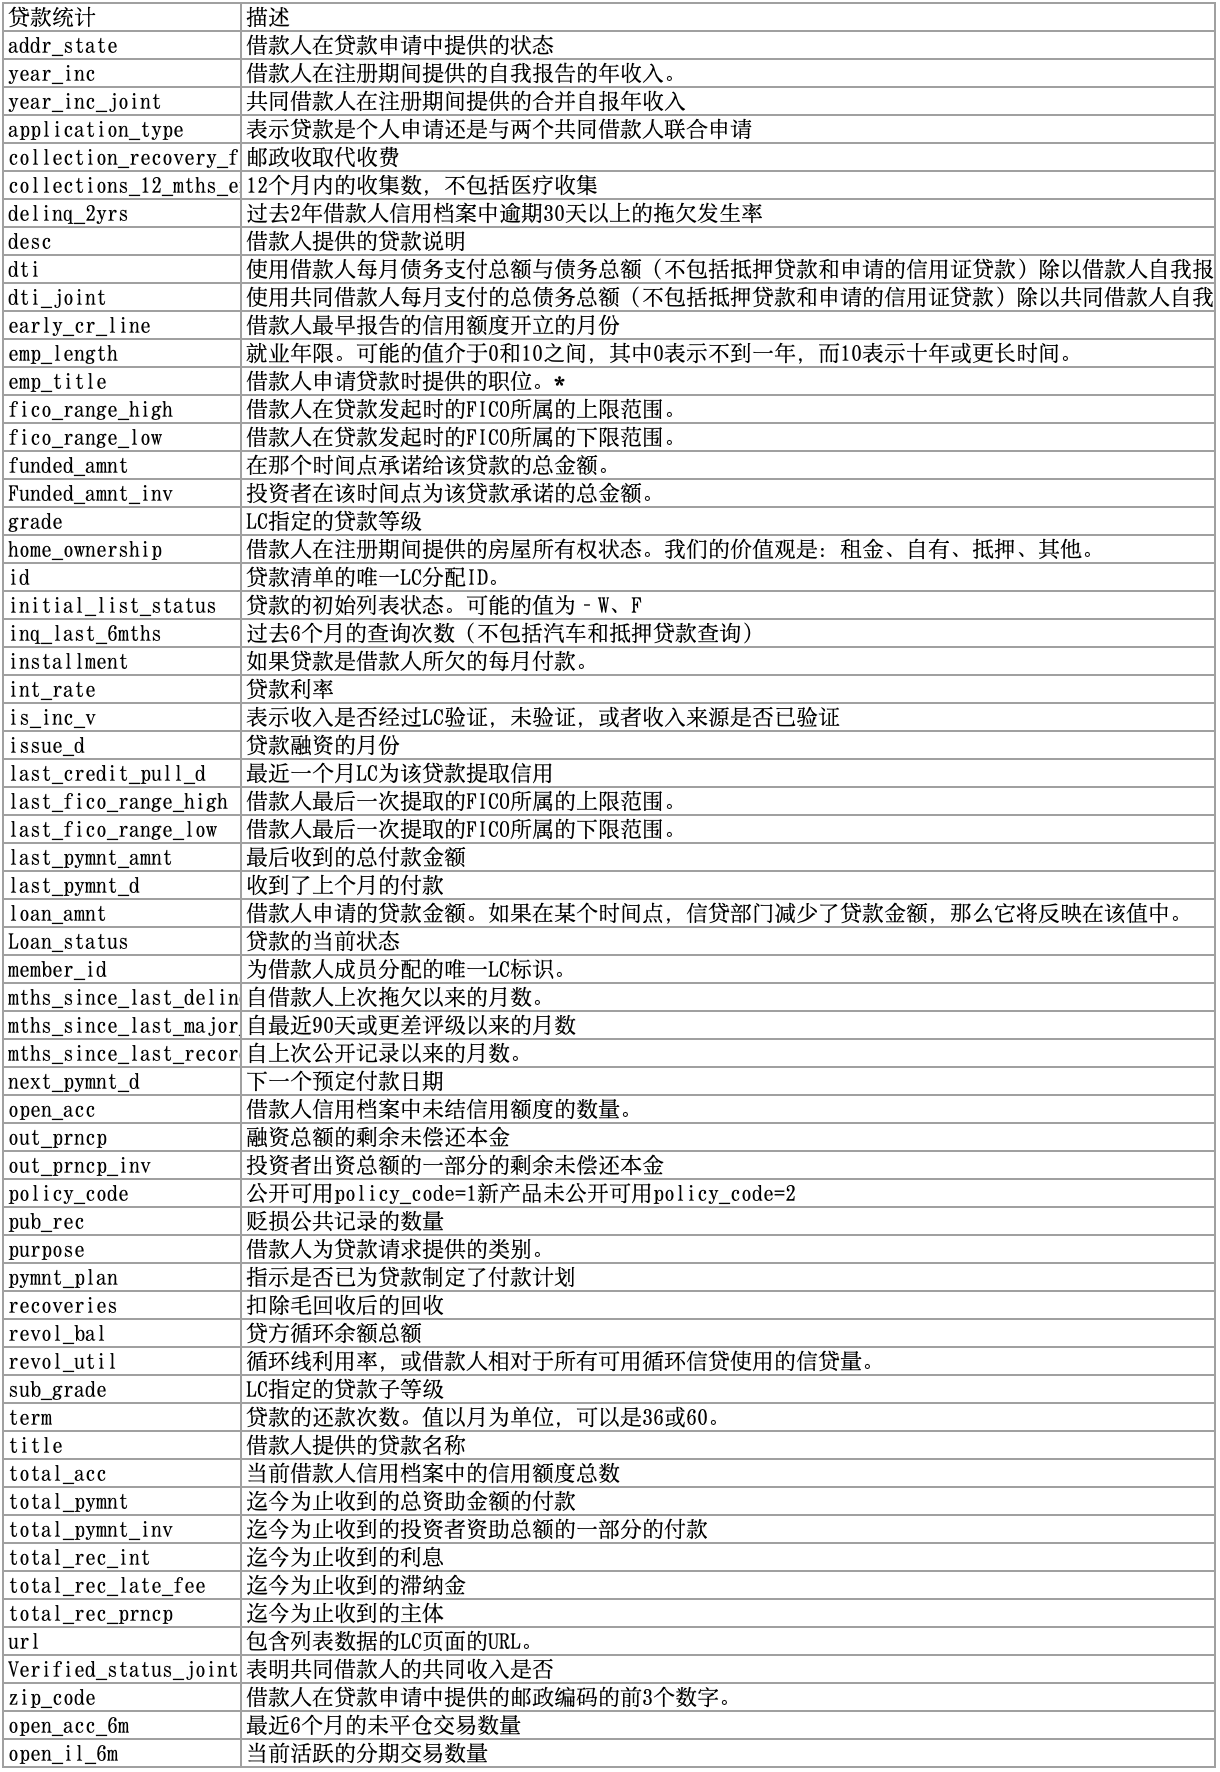


- 观察上述数据维度,结合4个维度,再加上我们训练集和测试集中我们实际拥有列的情况(列说明和实际的数据的列头还是存在不少差异),我们选择一个可以解释的衍生变量:
年还款总额占年收入的百分比,也就是:installment*12/annual_inc, 其中annual_inc来自于实际数据,应该对应到列说明中的year_inc

需要说明一点,根据课程内容,衍生变量不可为现有变量的加、减,因为那只是线性变换,并不能带来更多的信息,反而会影响到调參的复杂度,现在选择的衍生变量,来自于除法,将产生更多有用信息.

如下构建衍生变量:

In [43]:
train['pay_in_rate'] = train['continuous_installment']*12/train['continuous_annual_inc']

我们再对上述列进行简单的规整:
借款大于等于年收入,但小于年收入的2倍的,变量值为1;
借款大于等于年收入的2倍的,变量值为2;
其余的值为实际的结果

In [45]:
index_s1 = (train['pay_in_rate'] >= 1) & (train['pay_in_rate'] < 2)
if sum(index_s1) > 0:
  train.loc[index_s1, 'pay_in_rate'] = 1
index_s2 = (train['pay_in_rate'] >= 2)
if sum(index_s2) > 0:
  train.loc[index_s2, 'pay_in_rate'] = 2

In [50]:
train_new_2 = train.sample(frac=1)

In [51]:
train_new_2.to_csv("train_new_2.csv", index=False)
!ls

final  final.zip  sample_data  train_new_2.csv	train_new.csv


给测试集也增加衍生变量:

In [53]:
test['pay_in_rate'] = test['continuous_installment']*12/test['continuous_annual_inc']

In [55]:
index_t1 = (test['pay_in_rate'] >= 1) & (test['pay_in_rate'] < 2)
if sum(index_t1) > 0:
  test.loc[index_t1, 'pay_in_rate'] = 1
index_t2 = (test['pay_in_rate'] >= 2)
if sum(index_s2) > 0:
  test.loc[index_t2, 'pay_in_rate'] = 2

我们再次进行调参,现在直接采用基线的参数进行尝试:

In [59]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
for num_leaves in [20]:
  params = {'num_thread': 4, 'num_leaves': num_leaves, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
  train_pred, test_pred, error_rate, _ = fitter.train_k_fold(kfold, train_new_2, test, params = params)
  print(params)
  print(np.mean(error_rate))

The minimum is attained in round 859
The minimum is attained in round 796
The minimum is attained in round 698
The minimum is attained in round 869
The minimum is attained in round 537
{'num_thread': 4, 'num_leaves': 20, 'metric': 'binary', 'objective': 'binary', 'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
0.08042


In [60]:
1 - accuracy_score(test['loan_status'], (test_pred>0.5).astype(np.int64))

0.08201999999999998

我们发现在训练集上的效果变好了,但是在测试集上的效果也有较大提升,我们再考虑使用下一组参数检验效果:

In [61]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
for num_leaves in [20]:
  params = {'num_thread': 4, 'num_leaves': num_leaves, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}
  train_pred, test_pred, error_rate, _ = fitter.train_k_fold(kfold, train_new_2, test, params = params)
  print(params)
  print(np.mean(error_rate))

The minimum is attained in round 859
The minimum is attained in round 796
The minimum is attained in round 698
The minimum is attained in round 869
The minimum is attained in round 537
{'num_thread': 4, 'num_leaves': 20, 'metric': 'binary', 'objective': 'binary', 'num_round': 2000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}
0.08042


In [62]:
1 - accuracy_score(test['loan_status'], (test_pred>0.5).astype(np.int64))

0.08201999999999998

发现结果完全一致,至此,我们确认调参到此为止,我们的准确率从一开始的0.91754提升到0.91798,衍生变量还是存在一定的效果.

## 3. stacking 部分还要继续学习